In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

## Proyecto 1

- GABRIEL QUIROZ
- JOSE PABLO PONCE
- Martin España
- Sofia Rueda
- Oscar Ramos

In [3]:
df = pd.read_csv("../data/train.csv", index_col=0)

### Analisis Exploratorio


Primero obtenemos un panorama general de los datos observando el encabezado del dataframe

In [16]:
df.head()

,essay_id,discourse_text,discourse_type,discourse_effectiveness
discourse_id,,,,
0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate
9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate
c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate
a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate
db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate


Se muestran los tipos de datos del dataframe

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36765 entries, 0013cc385424 to c8a973681feb
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   essay_id                 36765 non-null  object
 1   discourse_text           36765 non-null  object
 2   discourse_type           36765 non-null  object
 3   discourse_effectiveness  36765 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [18]:
profile = ProfileReport(df)
profile

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]


Se muestran las estadisticas descriptivas del dataframe

In [19]:
df.describe()

,essay_id,discourse_text,discourse_type,discourse_effectiveness
count,36765,36765,36765,36765
unique,4191,36691,7,3
top,91B1F82B2CF1,Summer projects should be student-designed,Evidence,Adequate
freq,23,14,12105,20977


Se visualizan de mejor manera las columnas del dataframe

In [23]:
df.columns

Index(['essay_id', 'discourse_text', 'discourse_type',
       'discourse_effectiveness'],
      dtype='object')

#### Limpieza de Datos

Actualizamos los datos de tipos object a category

In [21]:
list_str_obj_cols = df.columns[df.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    df[str_obj_col] = df[str_obj_col].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36765 entries, 0013cc385424 to c8a973681feb
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   essay_id                 36765 non-null  category
 1   discourse_text           36765 non-null  category
 2   discourse_type           36765 non-null  category
 3   discourse_effectiveness  36765 non-null  category
dtypes: category(4)
memory usage: 2.0+ MB


Se eliminan las filas duplicadas

In [37]:
df = clean(df, method = "duplicates")

Se puede observar que el numero de datos se redujo

In [39]:
df.describe()

,essay_id,discourse_text,discourse_type,discourse_effectiveness
count,36763,36763,36763,36763
unique,4191,36691,7,3
top,4CA37D113612,Summer projects should be student-designed,Evidence,Adequate
freq,23,14,12105,20975


Se procede a obtener la correlacion entre las mismas variables

In [26]:
df_correlacion = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
df_correlacion

,essay_id,discourse_text,discourse_type,discourse_effectiveness
essay_id,1.000000,0.999029,0.013347,0.052347
discourse_text,0.999029,1.000000,0.013758,0.056086
discourse_type,0.013347,0.013758,1.000000,0.013267
discourse_effectiveness,0.052347,0.056086,0.013267,1.000000


Se realiza un mapa de calor para poder observar graficamente la correlacion entre las variables

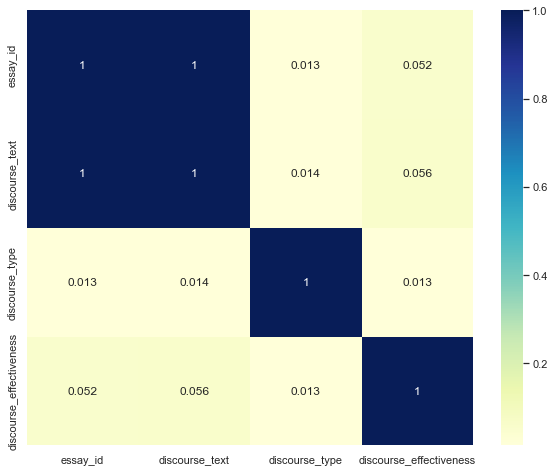

In [31]:
plt.figure(figsize=(10, 8))
dataplot = sns.heatmap(df_correlacion, cmap="YlGnBu", annot=True)

Se obtiene un recuento de cuantas veces aparecen los valores en cada columna 

In [33]:
for i in df:
    print(i)
    print(df[i].value_counts())

essay_id
4CA37D113612    23
900A879708F0    23
91B1F82B2CF1    23
6F271187D67D    22
73F69FA2E0E3    22
                ..
54B7666CDA35     1
A32414F5B216     1
D6A32ABCAB53     1
E4559E81E304     1
FFFF80B8CC2F     1
Name: essay_id, Length: 4191, dtype: int64
discourse_text
Summer projects should be student-designed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

Exploracion de la variable discourse_effectiveness

Bar Plot of discourse_effectiveness


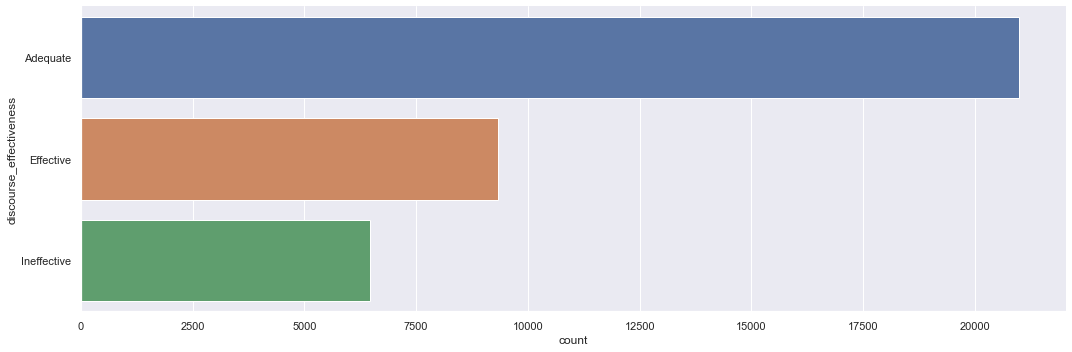

Summary of discourse_effectiveness


,count,relative_pct
Adequate,20977,0.57
Effective,9326,0.25
Ineffective,6462,0.18


In [4]:
eda_cat(df, x = "discourse_effectiveness")

Exploracion de la variable discourse_type

Bar Plot of discourse_type


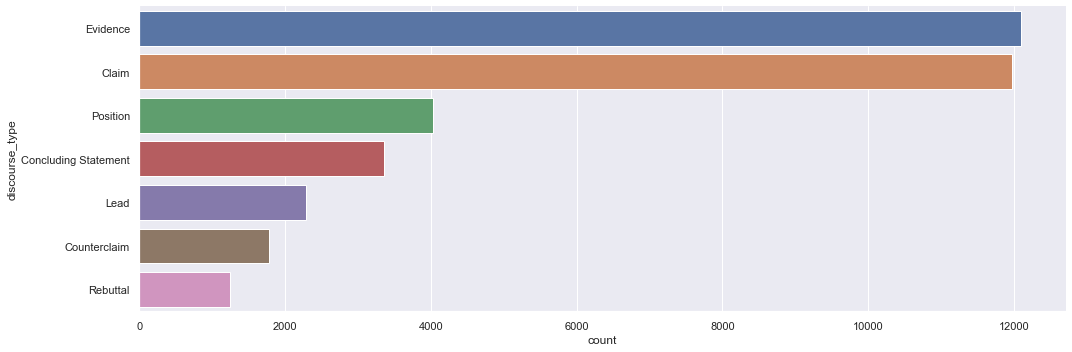

Summary of discourse_type


,count,relative_pct
Evidence,12105,0.33
Claim,11977,0.33
Position,4024,0.11
Concluding Statement,3351,0.09
Lead,2291,0.06
Counterclaim,1773,0.05
Rebuttal,1244,0.03


In [5]:
eda_cat(df, x = "discourse_type")

Se cruzan las variables discourse_effectiveness y discourse_type

Bar Plot of discourse_effectiveness with respect to discourse_type


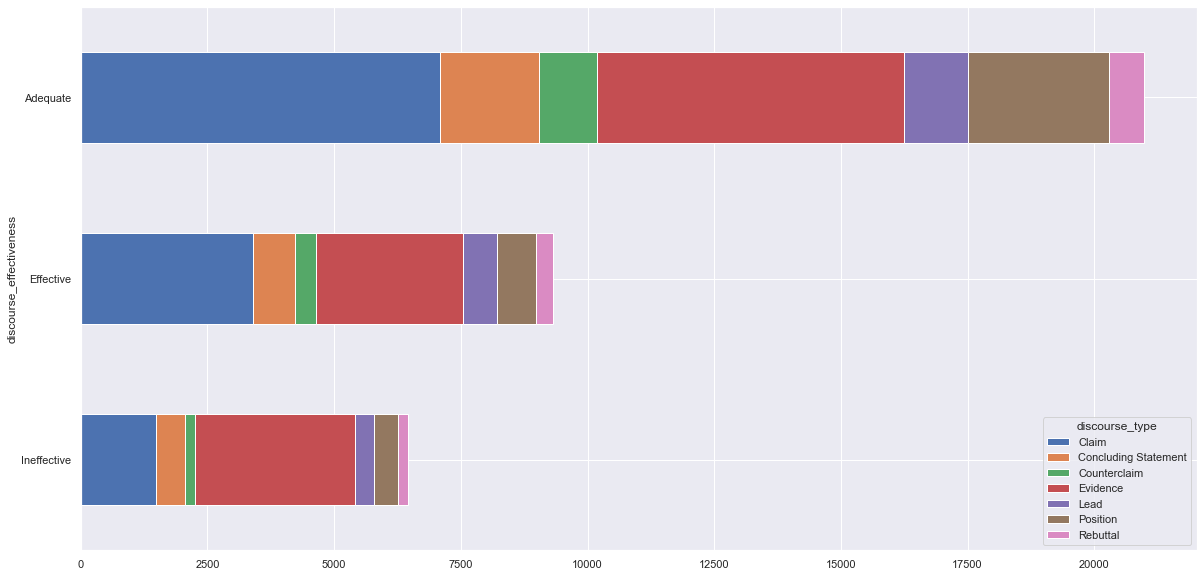

Crosstabulation of discourse_effectiveness across discourse_type


discourse_type,Claim,Concluding Statement,Counterclaim,Evidence,Lead,Position,Rebuttal
discourse_effectiveness,,,,,,,
Adequate,0.34,0.09,0.05,0.29,0.06,0.13,0.03
Effective,0.37,0.09,0.04,0.31,0.07,0.08,0.04
Ineffective,0.23,0.09,0.03,0.49,0.06,0.07,0.03


In [6]:
eda_cat(df, x='discourse_effectiveness', y='discourse_type')